## LEKOUNDA NGOLO Mardochet Gédéon
### COOP MSC | DATA SCIENCE 
### ASSIGNEMENT 1 : Machine Learning
### 23-11-2025

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns


In [26]:
import statsmodels.api as sm

In [27]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm


In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import subplots 

In [28]:
college2 = pd.read_csv('./data/College.csv', index_col=0)

In [29]:
college3 = college2.reset_index()                # ramener la colonne de noms
college3 = college3.rename(columns={'index': 'College'})
college3 = college3.set_index('College')

b. College dataset is loaded , we can first notice that header column index 0 is  empty 
so we replace by college (cause it refers about colleges) 

In [30]:
print(college3.columns)

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')


Overview of list of all columns, total we have 18 columns that means we deal with 18 explanatory variables

In [31]:
college = college3

Now college containt our dataset (college.csv) 

In [32]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Observation 
First observation of our dataset, we can see all variable and observation of our dataset

In [33]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


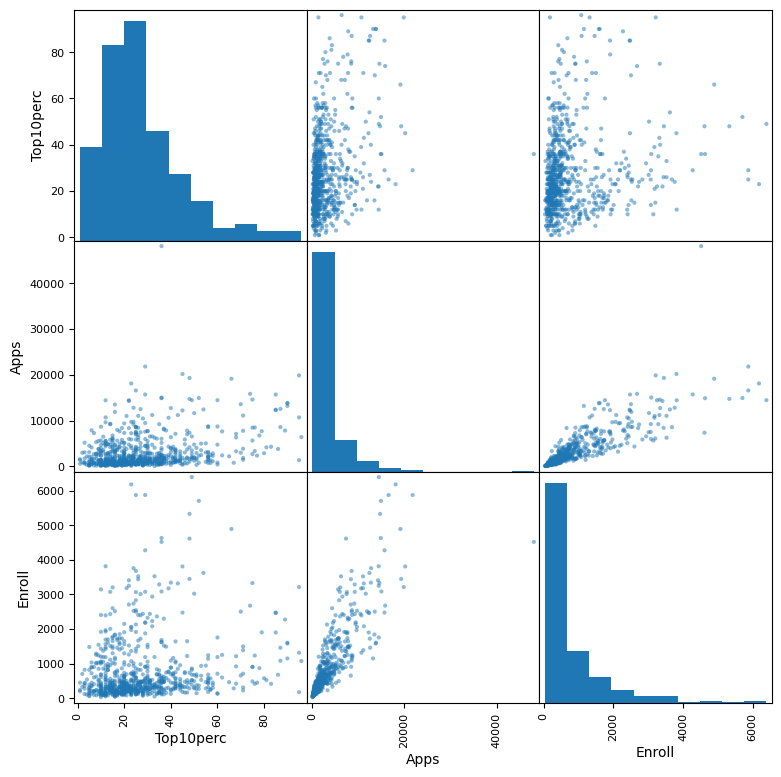

In [ ]:
import matplotlib.pyplot as plt
cols = ['Top10perc', 'Apps', 'Enroll']
scatter_matrix(college[cols], figsize=(9, 9), diagonal='hist')
plt.show()


### Observation :
 
##### Top10perc
- Distribution assez large, avec majorité des valeurs entre 10 et 50 %.
- Quelques établissements très sélectifs (60–100 %) mais rares.
##### Interpretation : 
variabilité importante du niveau académique des entrants.

##### Apps
- Distribution très asymétrique (forte right skew).
- La plupart des collèges reçoivent moins de 10 000 candidatures, mais quelques cas extrêmes dépassent 40 000.

#### Interprétation : 
Quelques établissements très populaires tirent la distribution vers le haut.

##### Enroll
- Distribution également très asymétrique : la plupart des colleges ont < 2000 inscrits.
- Quelques très grandes universités
##### Interpretation : 
forte hétérogénéité de taille.


Text(0.5, 0.98, '')

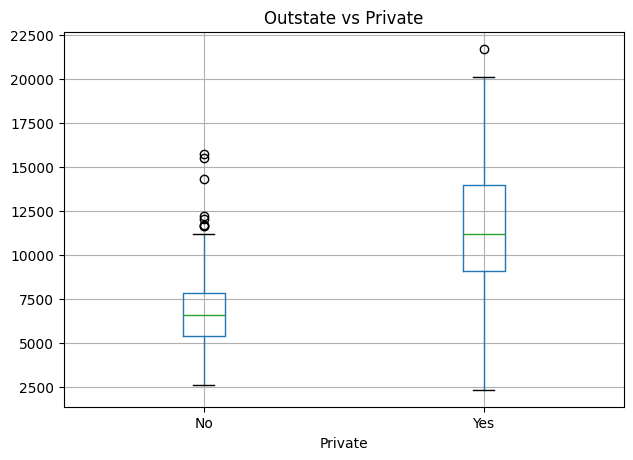

In [35]:
fig, ax = subplots(figsize=(7, 5))
college.boxplot(column='Outstate', by='Private', ax=ax)
ax.set_title('Outstate vs Private')
fig.suptitle('')   # enlever le titre automatique

In [36]:
college['Elite'] = pd.cut(college['Top10perc'],[0,0.5,1], labels=['No', 'Yes'])

In [37]:
college['Elite'].value_counts()


Elite
Yes    3
No     0
Name: count, dtype: int64

Text(0.5, 0.98, '')

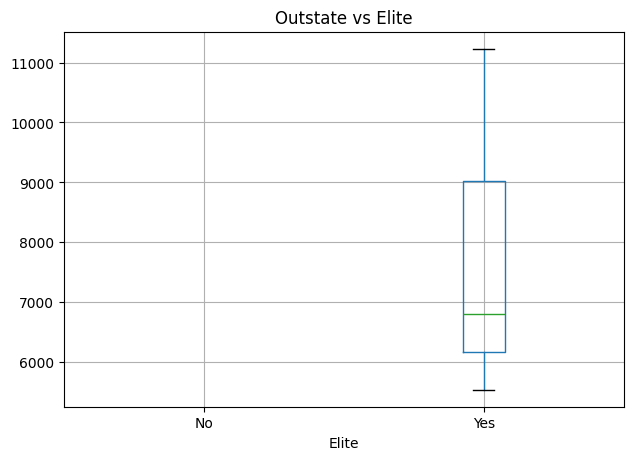

In [ ]:
fig, ax = subplots(figsize=(7, 5))
college.boxplot(column='Outstate', by='Elite', ax=ax)
ax.set_title('Outstate vs Elite')
fig.suptitle('') 

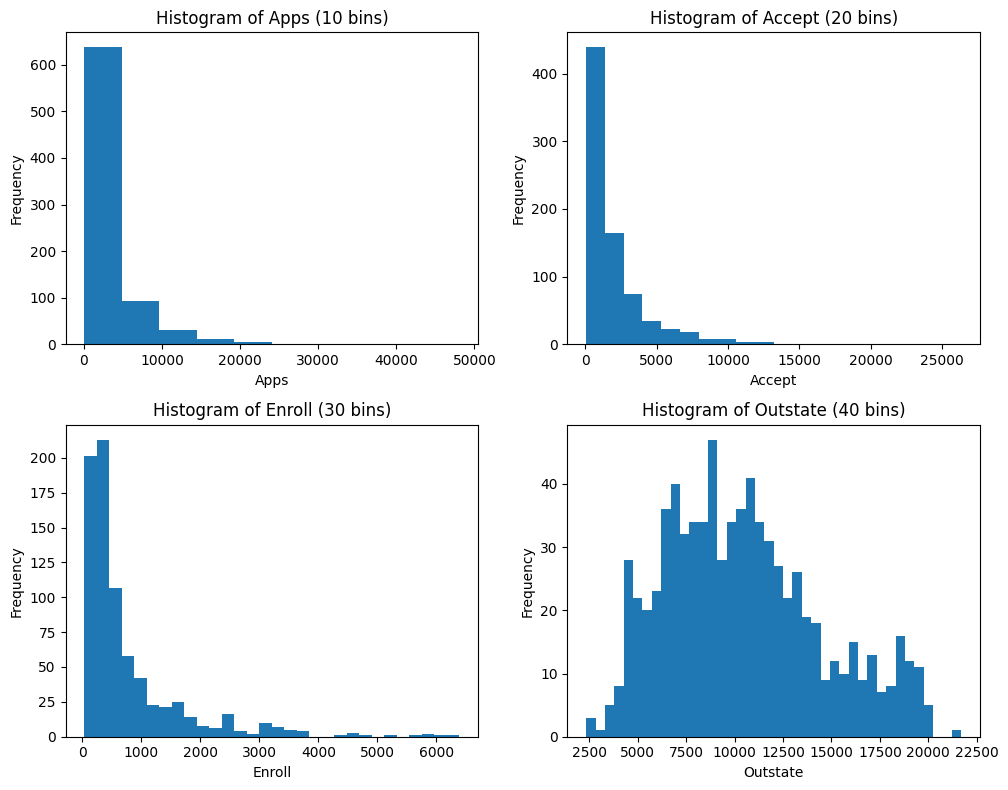

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

quant_vars = ['Apps', 'Accept', 'Enroll', 'Outstate']
bins_list  = [10, 20, 30, 40]   # différents nombres de bins

for ax, var, b in zip(axes.flatten(), quant_vars, bins_list):
    college[var].plot.hist(bins=b, ax=ax)
    ax.set_title(f"Histogram of {var} ({b} bins)")
    ax.set_xlabel(var)

plt.tight_layout()
plt.show()


## Chapter 3  : Applied exercise 9 

In [56]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [47]:
auto = load_data('Auto')

In [50]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

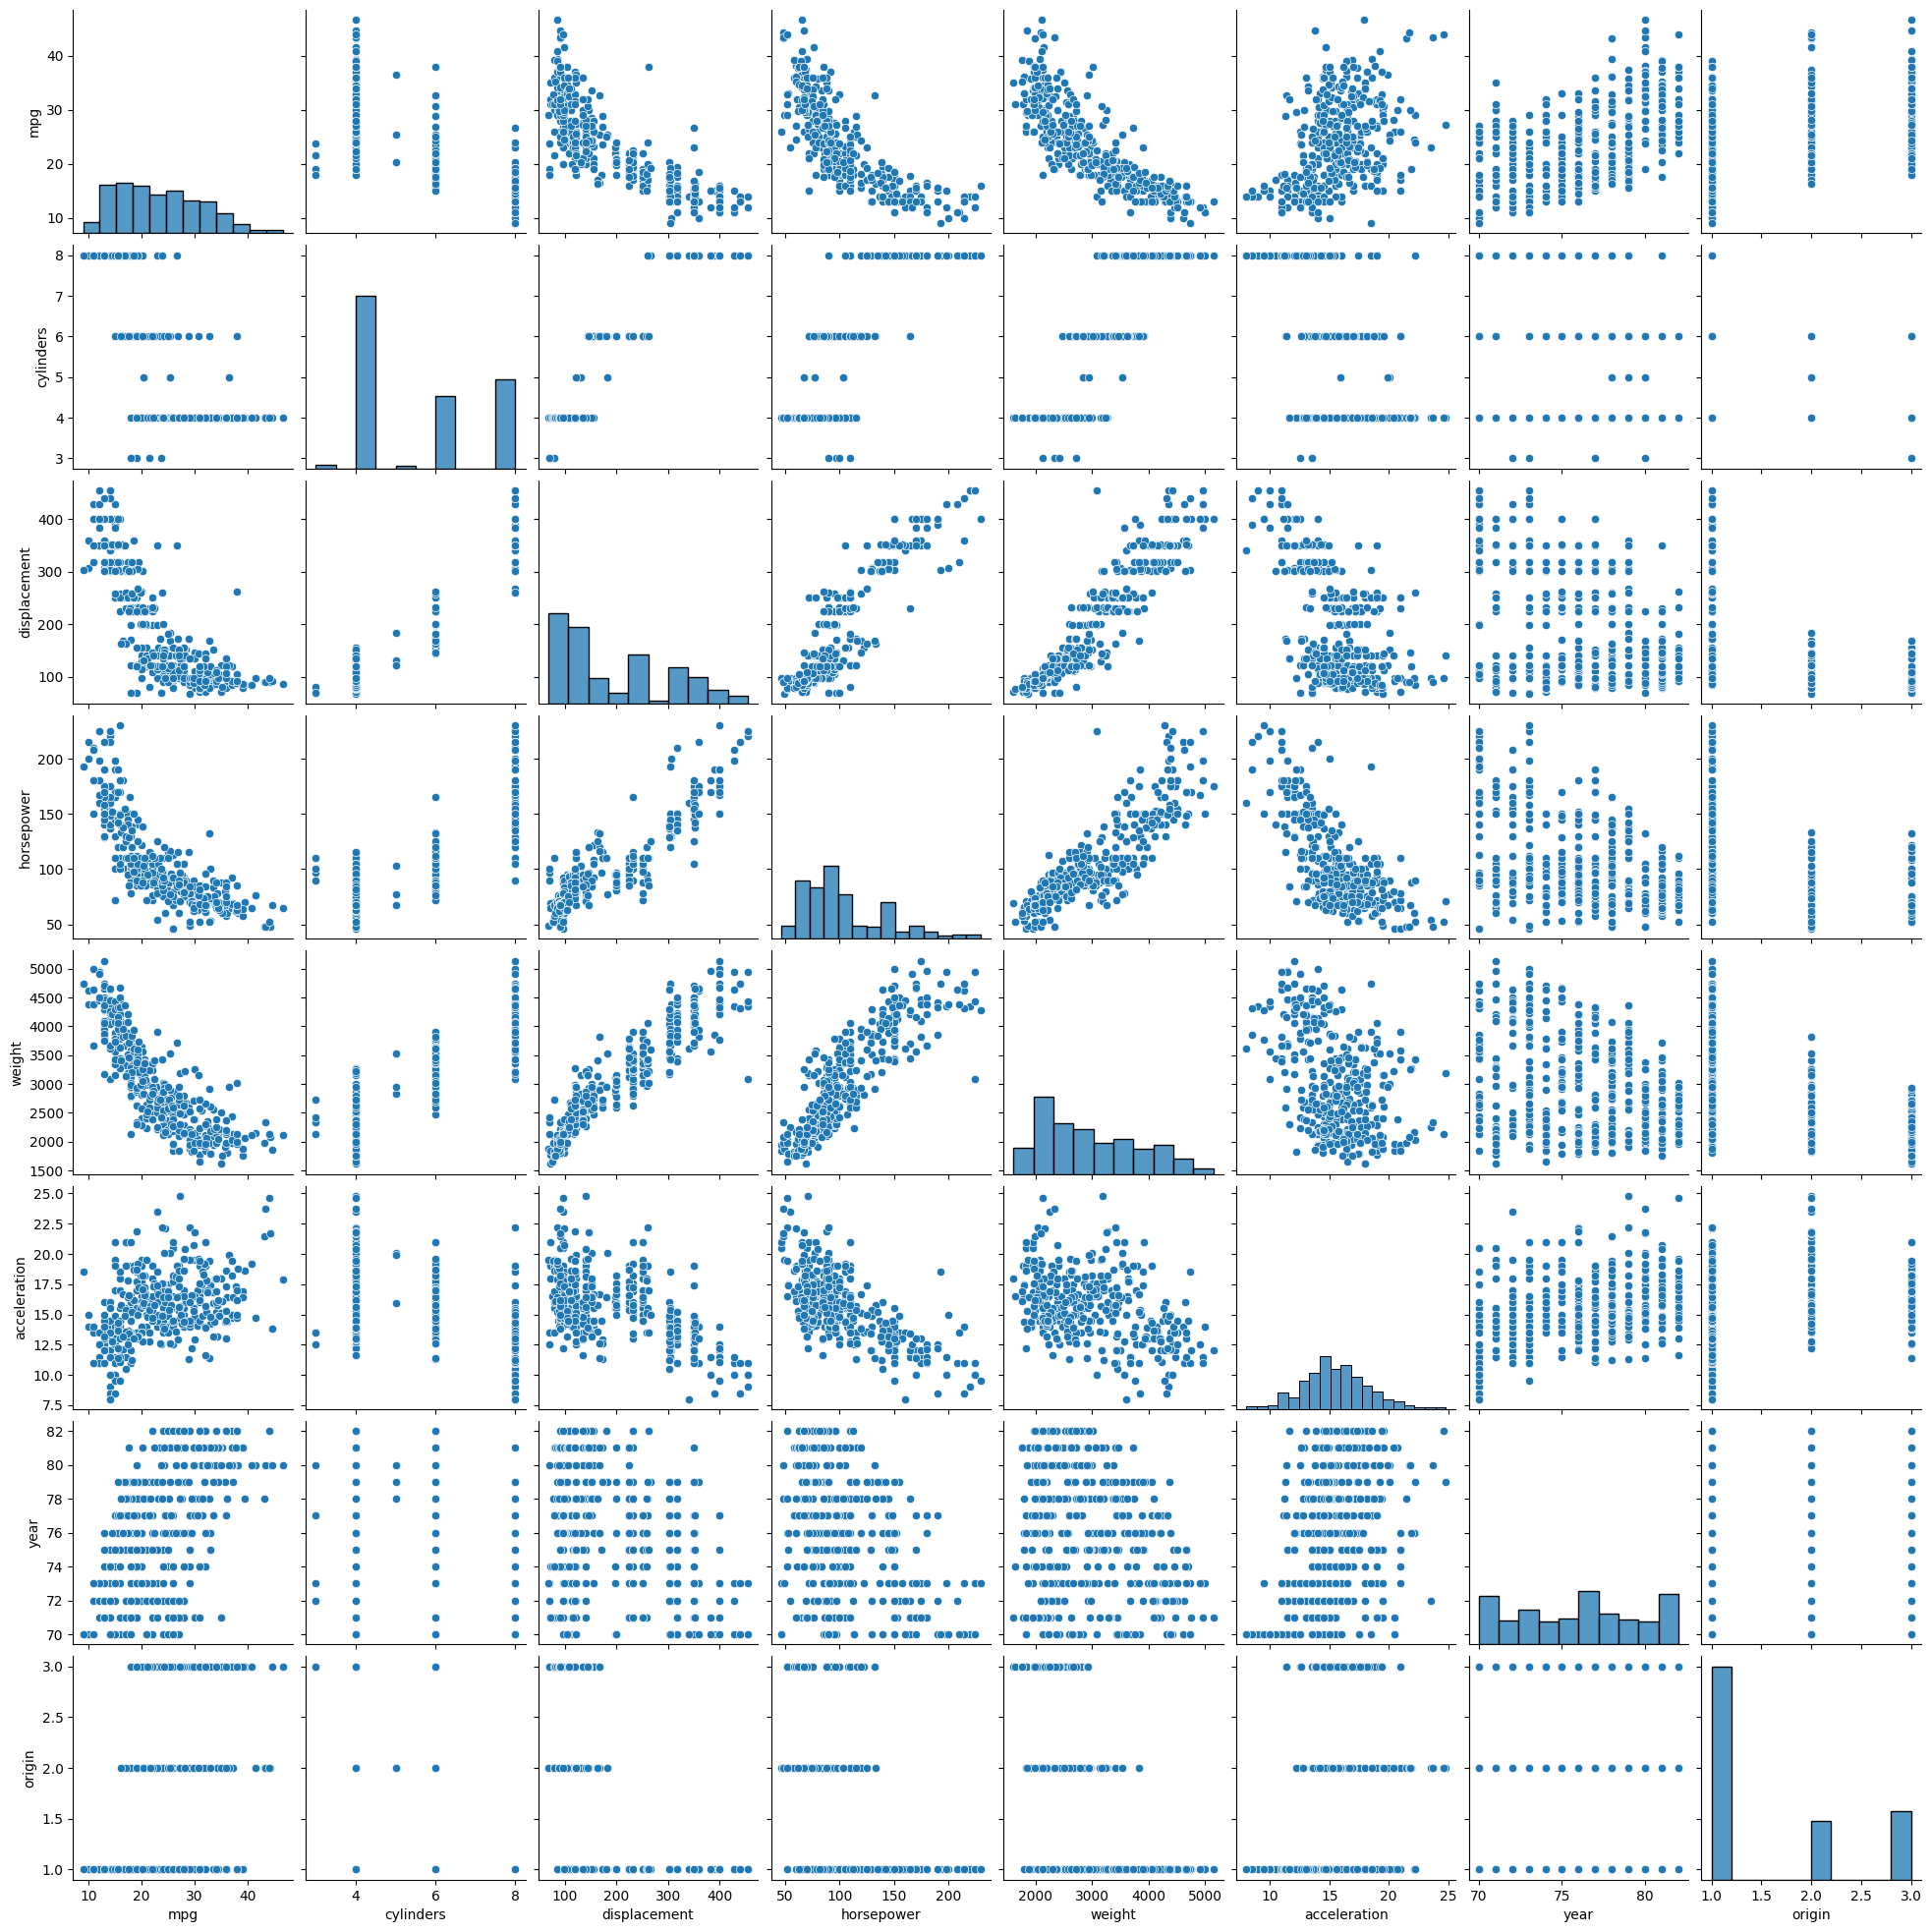

In [ ]:
# Scatterplot matrix (pairplot) avec toutes les variables
sns.pairplot(auto)
plt.show()


<Figure size 1200x1200 with 0 Axes>

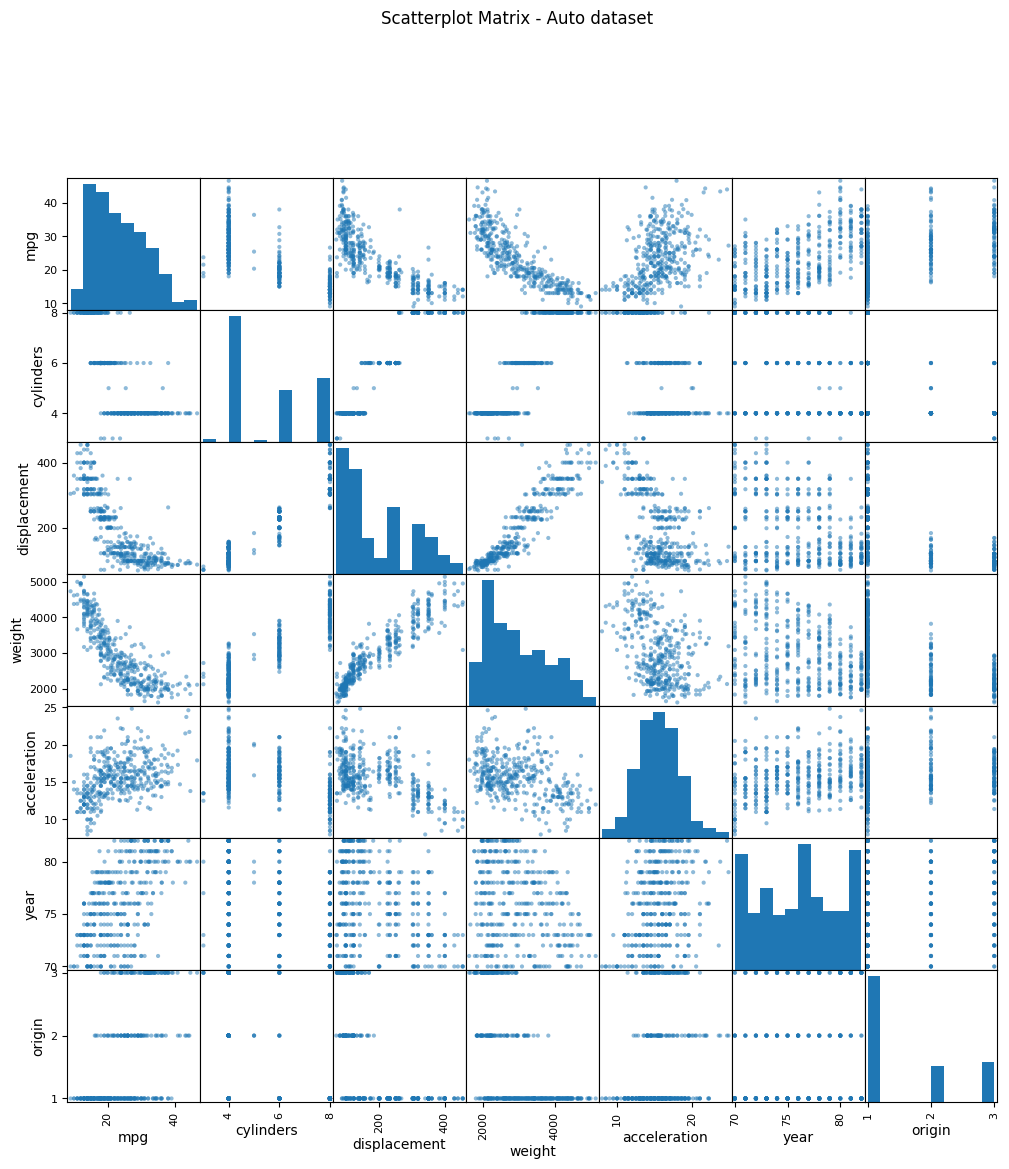

In [43]:
# (a) Scatterplot matrix avec toutes les variables
plt.figure(figsize=(12, 12))
scatter_matrix(auto, figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatterplot Matrix - Auto dataset", y=1.02)
plt.show()

In [49]:
# (b) Calcul de la matrice de corrélation
corr_matrix  = auto.corr()
print("Matrice de corrélation :\n", corr_matrix)

Matrice de corrélation :
                    mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.00

In [54]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
X = auto.drop(['mpg'], axis=1)

X = sm.add_constant(X)
y = auto['mpg']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                gaa, 22 now 2025   Prob (F-statistic):          2.04e-139
Time:                        14:28:11   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [ ]:
summarize(model)

,coef,std err,t,P>|t|
const,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [63]:
from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(model)
print(anova_results)


                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


### ii Interpretation: All predictors except acceleration have a significant relationship with mpg.
- There is a strong relationship between most predictors and mpg.
- acceleration does not significantly affect mpg when controlling for the other variables.
- Variables like cylinders, weight, and year have the largest effect sizes..

### iii.The coefficient of the year variable in the regression model represents the average effect of one additional year on mpg, holding all other variables constant.
- If the coefficient is positive, it indicates that newer cars have higher fuel efficiency (higher mpg).

- For example, a coefficient of 0.75 means that each additional model year increases the average mpg by 0.75 miles per gallon, all else being equal.

## Chapter 4 : applied exercice 14



In [ ]:
auto = load_data('Auto')

In [66]:
# Compute median of mpg
mpg_median = auto['mpg'].median()

# Create binary variable: 1 if mpg > median, 0 if mpg <= median
auto['mpg01'] = (auto['mpg'] > mpg_median).astype(int)

# Check the new column
print(auto[['mpg', 'mpg01']].head())

                            mpg  mpg01
name                                  
chevrolet chevelle malibu  18.0      0
buick skylark 320          15.0      0
plymouth satellite         18.0      0
amc rebel sst              16.0      0
ford torino                17.0      0


<Figure size 600x400 with 0 Axes>

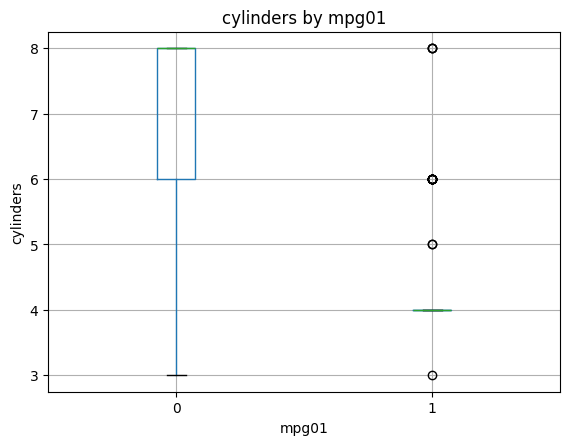

<Figure size 600x400 with 0 Axes>

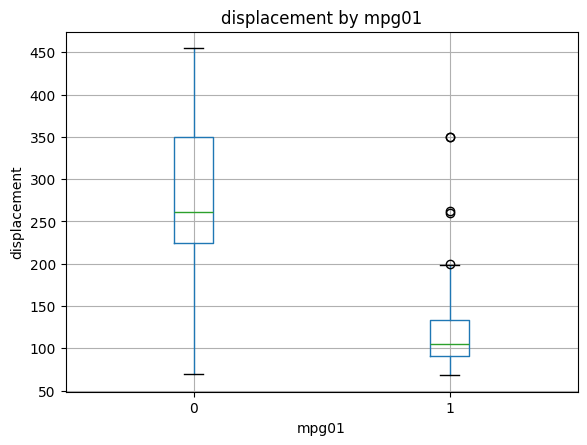

<Figure size 600x400 with 0 Axes>

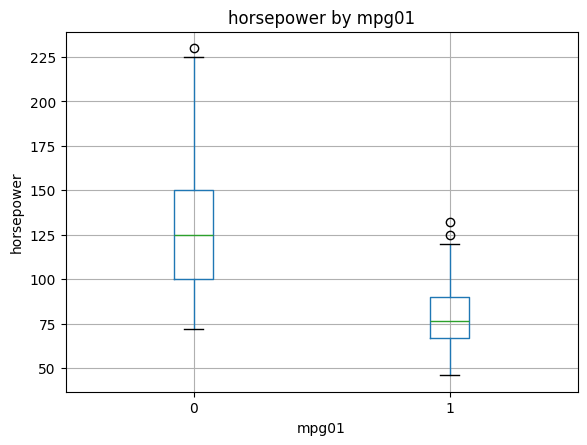

<Figure size 600x400 with 0 Axes>

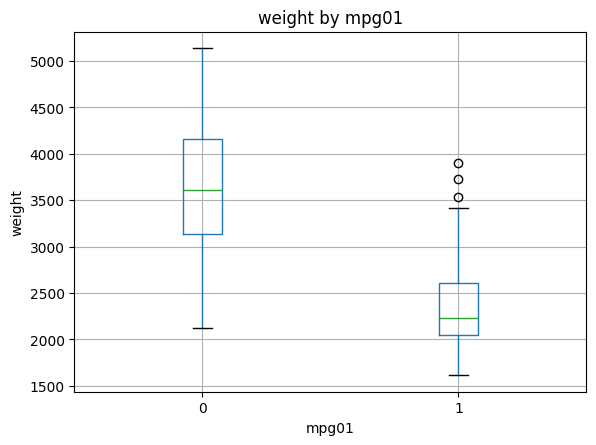

<Figure size 600x400 with 0 Axes>

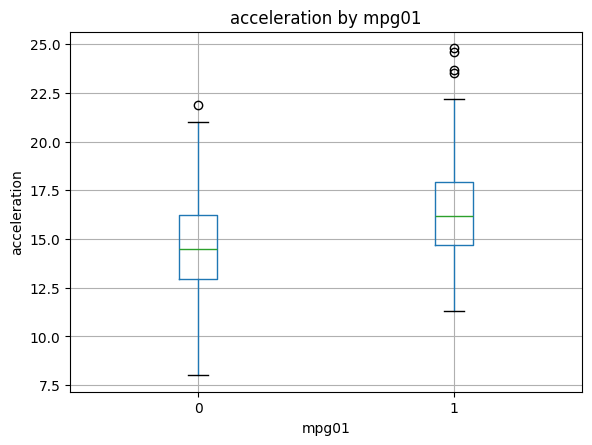

<Figure size 600x400 with 0 Axes>

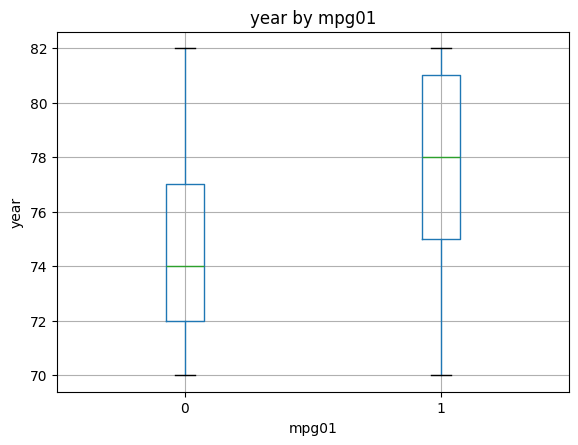

<Figure size 600x400 with 0 Axes>

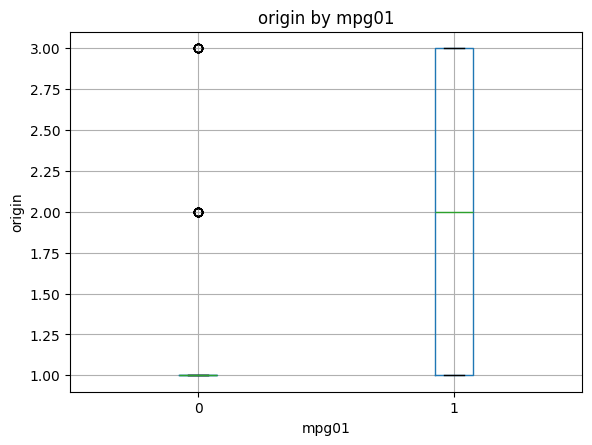

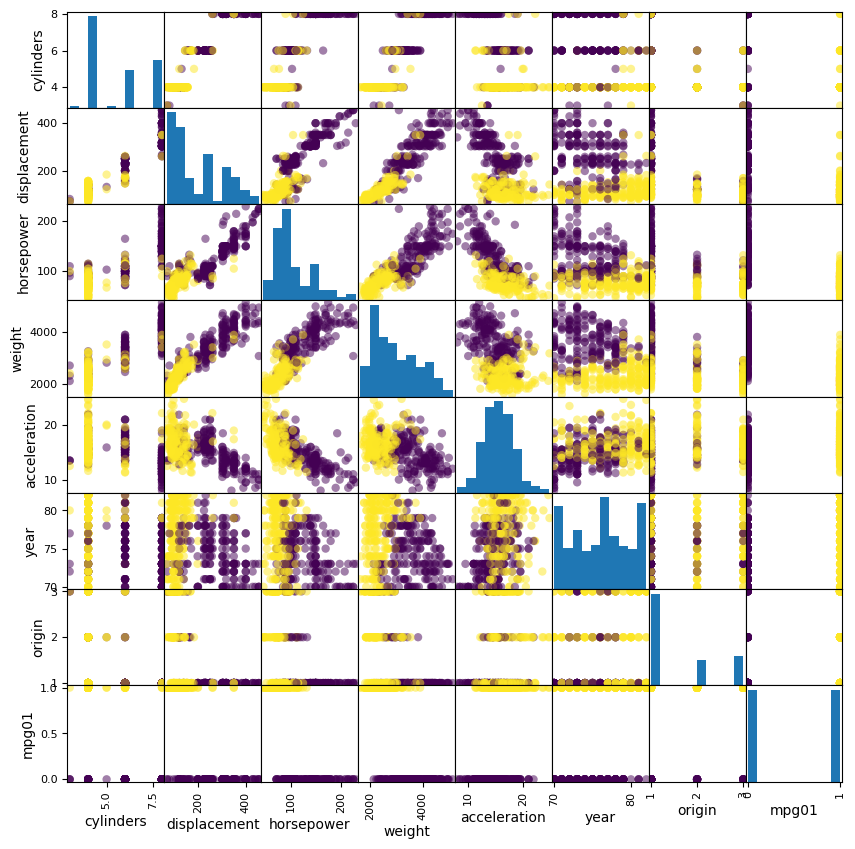

In [67]:
# List of numeric predictors (excluding mpg and mpg01)
numeric_cols = auto.select_dtypes(include='number').columns
numeric_cols = [c for c in numeric_cols if c not in ['mpg', 'mpg01']]

# Boxplots of each numeric variable versus mpg01
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    auto.boxplot(column=col, by='mpg01')
    plt.title(f'{col} by mpg01')
    plt.suptitle('')
    plt.xlabel('mpg01')
    plt.ylabel(col)
    plt.show()

# Optional: scatterplot matrix for numeric predictors colored by mpg01
pd.plotting.scatter_matrix(auto[numeric_cols + ['mpg01']], figsize=(10,10), diagonal='hist', c=auto['mpg01'], marker='o', alpha=0.5)
plt.show()


In [ ]:
# Features (X) and response (y)
X = auto.drop(['mpg', 'mpg01'], axis=1).select_dtypes(include='number')
y = auto['mpg01']

# Split into training and test sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check shapes
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)